# **Handwritten Digit Recognition (MNIST) - ANN**

## **Import Libraries & Dataset**

In [130]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [131]:
# load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

## **Exploratory Data Analysis**

In [132]:
# shape

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}\n')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)

y_train shape: (60000,)
y_test shape: (10000,)


In [133]:
# pixel value range

print(f'{X_train.min()}, {X_train.max()}')

0, 255


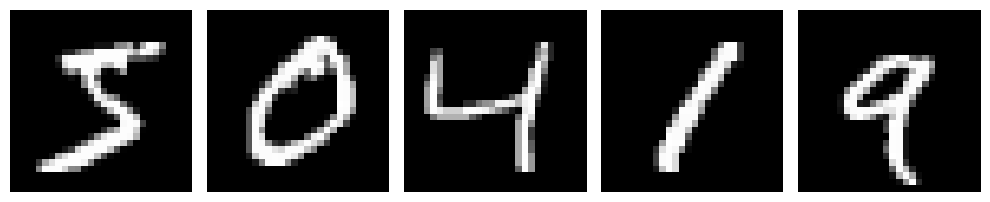

In [134]:
# first 5 images

plt.figure(figsize=(10, 5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')
plt.tight_layout()
plt.show()

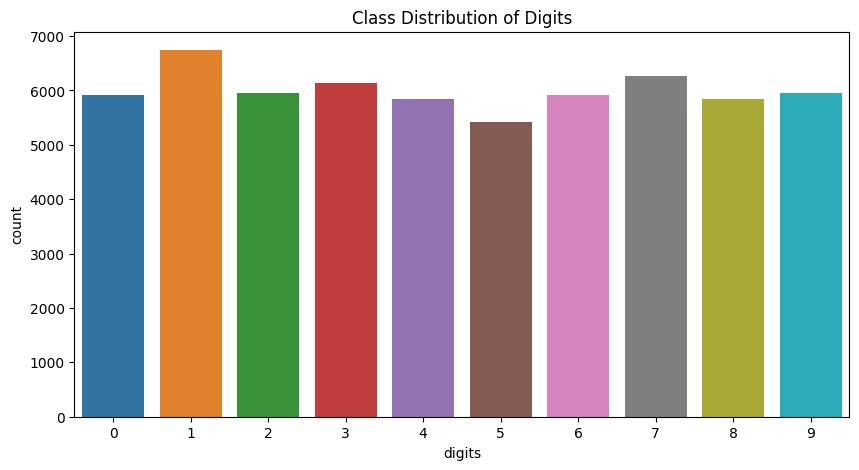

In [135]:
# class distribution

y_train = y_train.ravel()

plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, hue=y_train, palette='tab10', legend=False)
plt.title("Class Distribution of Digits")
plt.xlabel("digits")
plt.show()

## **Data Preprocessing**

In [136]:
# normalize pixel values

X_train = X_train / 255.0
X_test = X_test / 255.0

In [137]:
# flatten the input

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

## **Build the ANN model**

In [138]:
# ann model

model = Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [139]:
# compile

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [140]:
# train

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8700 - loss: 0.4578 - val_accuracy: 0.9628 - val_loss: 0.1299
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9630 - loss: 0.1313 - val_accuracy: 0.9672 - val_loss: 0.1104
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9730 - loss: 0.0873 - val_accuracy: 0.9792 - val_loss: 0.0746
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9811 - loss: 0.0634 - val_accuracy: 0.9770 - val_loss: 0.0755
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9868 - loss: 0.0454 - val_accuracy: 0.9800 - val_loss: 0.0690


In [141]:
X_test = X_test.reshape(-1, 784)

In [142]:
# evaluation

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'loss: {test_loss}, \naccuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0852
loss: 0.07514259219169617, 
accuracy: 0.9771999716758728


In [143]:
# prediction

prediction = model.predict(X_test)

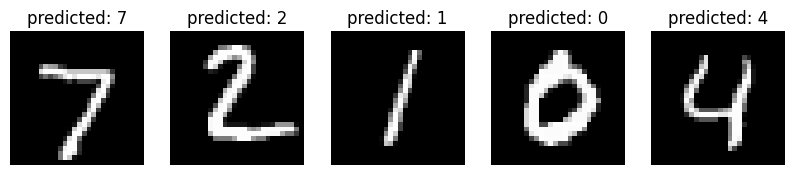

In [148]:
# visualize

plt.figure(figsize=(10, 5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'predicted: {np.argmax(prediction[i])}')
  plt.axis('off')
plt.show()